# Exercise Set 03: Spurious Correlations

BEE 4850/5850, Fall 2024

**Name**: Anthony Nicolaides

**ID**: ajn68

> **Due Date**
>
> Friday, 2/9/24, 9:00pm

## Overview

### Instructions

The goal of this exercise is for you to find datasets and reason about
the relationships (or lack thereof!) between variables.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Documents/BEE5850/exercises/ex_week03_BEE5850`


The following packages are included in the environment (to help you find
other similar packages in other languages). The code below loads these
packages for use in the subsequent notebook (the desired functionality
for each package is commented next to the package).

In [7]:
using DataFrames # tabular data structure
using CSV # reads/writes .csv files
using Plots # plotting library
using StatsBase # statistical quantities like mean, median, etc
using StatsPlots # some additional statistical plotting tools

## Problem

Find a single or multiple datasets (don’t just pull from [Spurious
Correlations!](https://www.tylervigen.com/spurious-correlations)!) where
two or more variables appear to be correlated, but this correlation is
likely spurious. Plot the relevant variable(s) and show they are
correlated through any needed quantiative and/or qualitative means.
Explain why you think the correlation is spurious.

In [21]:
oranges = CSV.read("statistic_id236882_us-retail-price-of-navel-oranges-1995-2022.csv", DataFrame)

Row,U.S. retail price of navel oranges 1995-2022,Column2
,String?,Float64?
1,Retail price of navel oranges in the United States from 1995 to 2022 (in U.S. dollars per pound),missing
2,missing,missing
3,1995,0.64
4,1996,0.59
5,1997,0.58
6,1998,0.61
7,1999,0.64
8,2000,0.62
9,2001,0.71


In [22]:
france = CSV.read("statistic_id459939_total-population-in-france-1982-2023.csv", DataFrame)

Row,Total population in France 1982-2023,Column2
,String?,Float64?
1,Total population of France from 1982 to 2023 (in millions),missing
2,missing,missing
3,1982,55.57
4,1983,55.9
5,1984,56.17
6,1985,56.44
7,1986,56.72
8,1987,57.01
9,1988,57.33


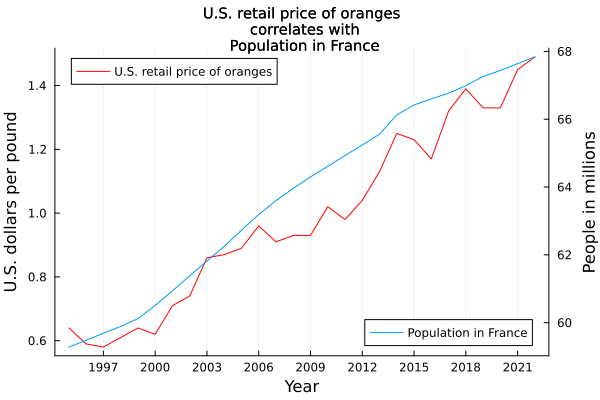

In [98]:
# make sure only the values are from 1995-2022
plot(oranges[:, "U.S. retail price of navel oranges 1995-2022"][3:end],
    oranges[:, 2][3:end],
    ylabel="U.S. dollars per pound",
    label="U.S. retail price of oranges",
    linecolor=:red,
    xlabel="Year")
# twinx() allows for two y-axes
plot!(twinx(), france[:, "Total population in France 1982-2023"][16:end-1],
    france[:, 2][16:end-1],
    ylabel="People in millions",
    label="Population in France",
    legend=:bottomright)
# make sure only the values are from 1995-2022
title!("U.S. retail price of oranges\n correlates with\n Population in France",
    fontsize=10,
    titlefont=font(10))


In [86]:
# calculate the correlation coefficent between the two datasets
correlation = cor(oranges[:, 2][3:end], france[:, 2][16:end-1])

0.9764065653229481

## References